In [1]:
# conda install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import seaborn as sns 
import scipy.stats as stats

In [3]:
wine = pd.read_csv('./data/wine.csv')

In [4]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


- 컬럼의 종류
 - fixed acidity : 고정 산도
 - volatile acidity : 휘발성 산도
 - citric acid : 시트르산
 - residual sugar : 잔류 당분
 - chlorides : 염화물
 - free sulfur dioxide : 자유 이산화황
 - total sulfur dioxide : 총 이산화황
 - density : 밀도
 - pH
 - sulphates : 황산염
 - alcohol
 - quality : 0 ~ 10(높을 수록 좋은 품질)
 - type : 와인 종류

In [5]:
wine = wine[~wine.duplicated(wine.columns, keep='last')]

---

In [6]:
wine.columns = ['고정산', '휘발산', '구연산', '잔여당', '염화물', '무수아황산', '총이산화황', 
                '밀도', '산성도', '황산염', '알콜도수', '와인품질', '와인종류'] 

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 1 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고정산     5320 non-null   float64
 1   휘발산     5320 non-null   float64
 2   구연산     5320 non-null   float64
 3   잔여당     5320 non-null   float64
 4   염화물     5320 non-null   float64
 5   무수아황산   5320 non-null   float64
 6   총이산화황   5320 non-null   float64
 7   밀도      5320 non-null   float64
 8   산성도     5320 non-null   float64
 9   황산염     5320 non-null   float64
 10  알콜도수    5320 non-null   float64
 11  와인품질    5320 non-null   int64  
 12  와인종류    5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


In [8]:
wine.describe()

,고정산,휘발산,구연산,잔여당,염화물,무수아황산,총이산화황,밀도,산성도,황산염,알콜도수,와인품질
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:

%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [7]:
plt.figure(figsize=(12,12))
for i in range(0,11):    
    plt.subplot(3,4,i+1)
    sns.histplot(wine.iloc[:,i])
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [13]:
pd.DataFrame(wine.와인품질.value_counts())

,와인품질
6,2323
5,1752
7,856
4,206
8,148
3,30
9,5


In [5]:
sns.countplot(x='와인품질', data=wine)
plt.grid()
plt.show()

ValueError: Could not interpret input '와인품질'

<IPython.core.display.Javascript object>


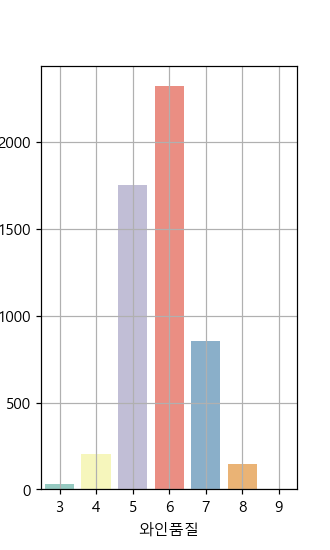

In [18]:
plt.figure(figsize=(3, 5)) 
sns.countplot(x='와인품질', palette=sns.color_palette('Set3'), data = wine)
plt.grid()
plt.show()

In [15]:
pd.DataFrame(wine.와인종류.value_counts())

,와인종류
white,3961
red,1359


<IPython.core.display.Javascript object>


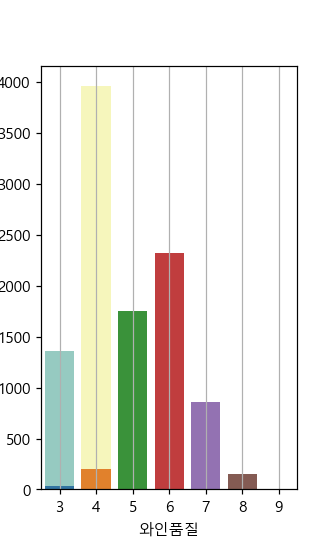

In [16]:
plt.figure(figsize=(3, 5)) 
sns.countplot(x='와인종류', palette=sns.color_palette('Set3'), data = wine)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


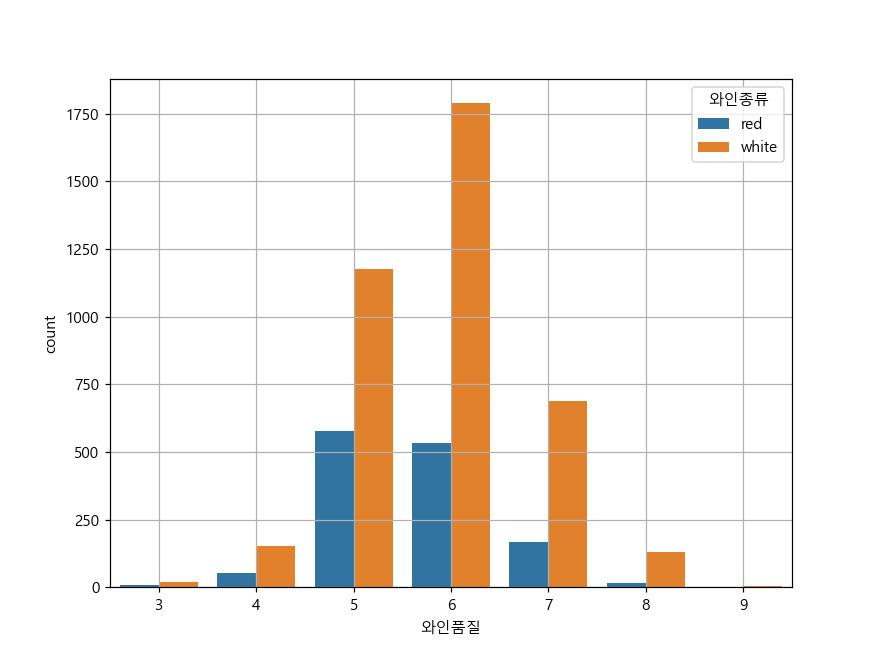

In [20]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='와인품질',hue='와인종류', data=wine)
plt.grid()
plt.show()

In [21]:
wine_corr = wine.corr()

C:\Users\iebpr\AppData\Local\Temp\ipykernel_23764\2780300261.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_corr = wine.corr()


In [22]:
wine_corr

,고정산,휘발산,구연산,잔여당,염화물,무수아황산,총이산화황,밀도,산성도,황산염,알콜도수,와인품질
고정산,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
휘발산,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
구연산,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
잔여당,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
염화물,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
무수아황산,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
총이산화황,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
밀도,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
산성도,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
황산염,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


In [23]:
pd.DataFrame(wine_corr.와인품질.sort_values(ascending = False))

,와인품질
와인품질,1.000000
알콜도수,0.469422
구연산,0.097954
무수아황산,0.054002
황산염,0.041884
산성도,0.039733
총이산화황,-0.050296
잔여당,-0.056830
고정산,-0.080092
염화물,-0.202137


In [24]:
pd.DataFrame(wine_corr.loc[wine_corr.와인품질 > 0, '와인품질'])

,와인품질
구연산,0.097954
무수아황산,0.054002
산성도,0.039733
황산염,0.041884
알콜도수,0.469422
와인품질,1.000000


In [25]:
pd.DataFrame(wine_corr.loc[wine_corr.와인품질 < 0, '와인품질'])

,와인품질
고정산,-0.080092
휘발산,-0.265205
잔여당,-0.056830
염화물,-0.202137
총이산화황,-0.050296
밀도,-0.326434


<IPython.core.display.Javascript object>


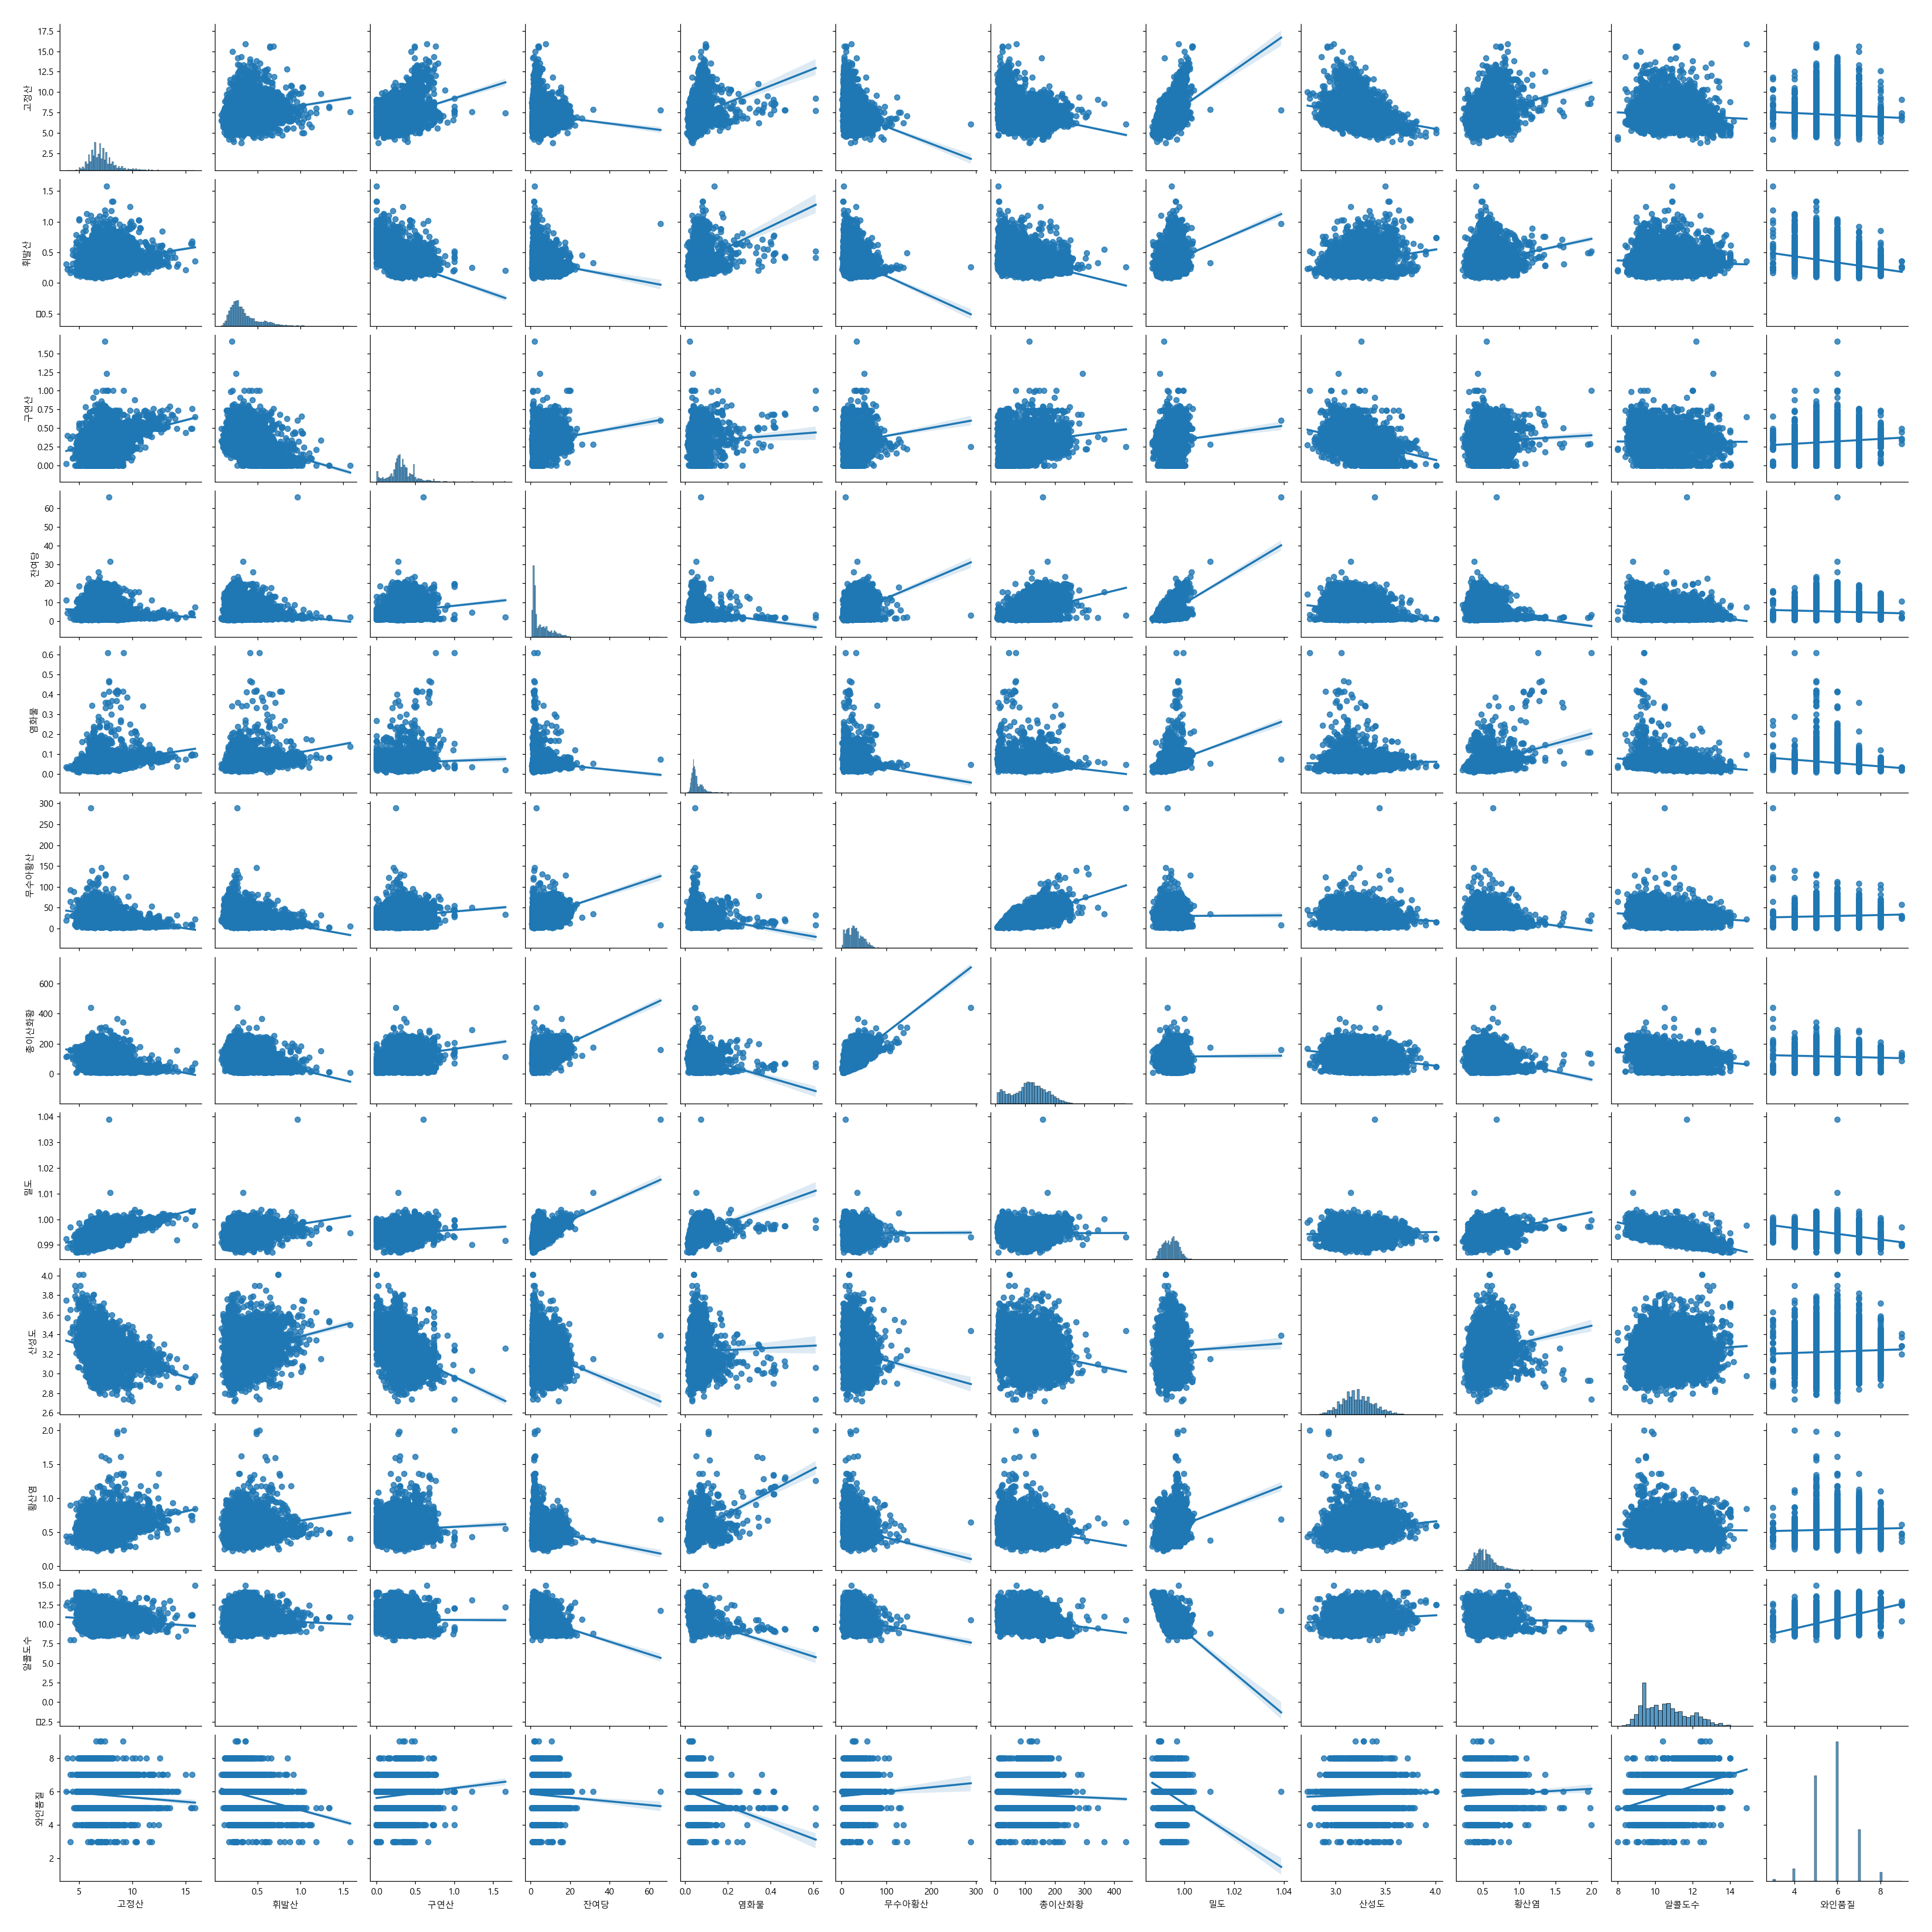

C:\Users\iebpr\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


In [26]:
sns.pairplot(wine, kind = 'reg')
plt.show()

<IPython.core.display.Javascript object>


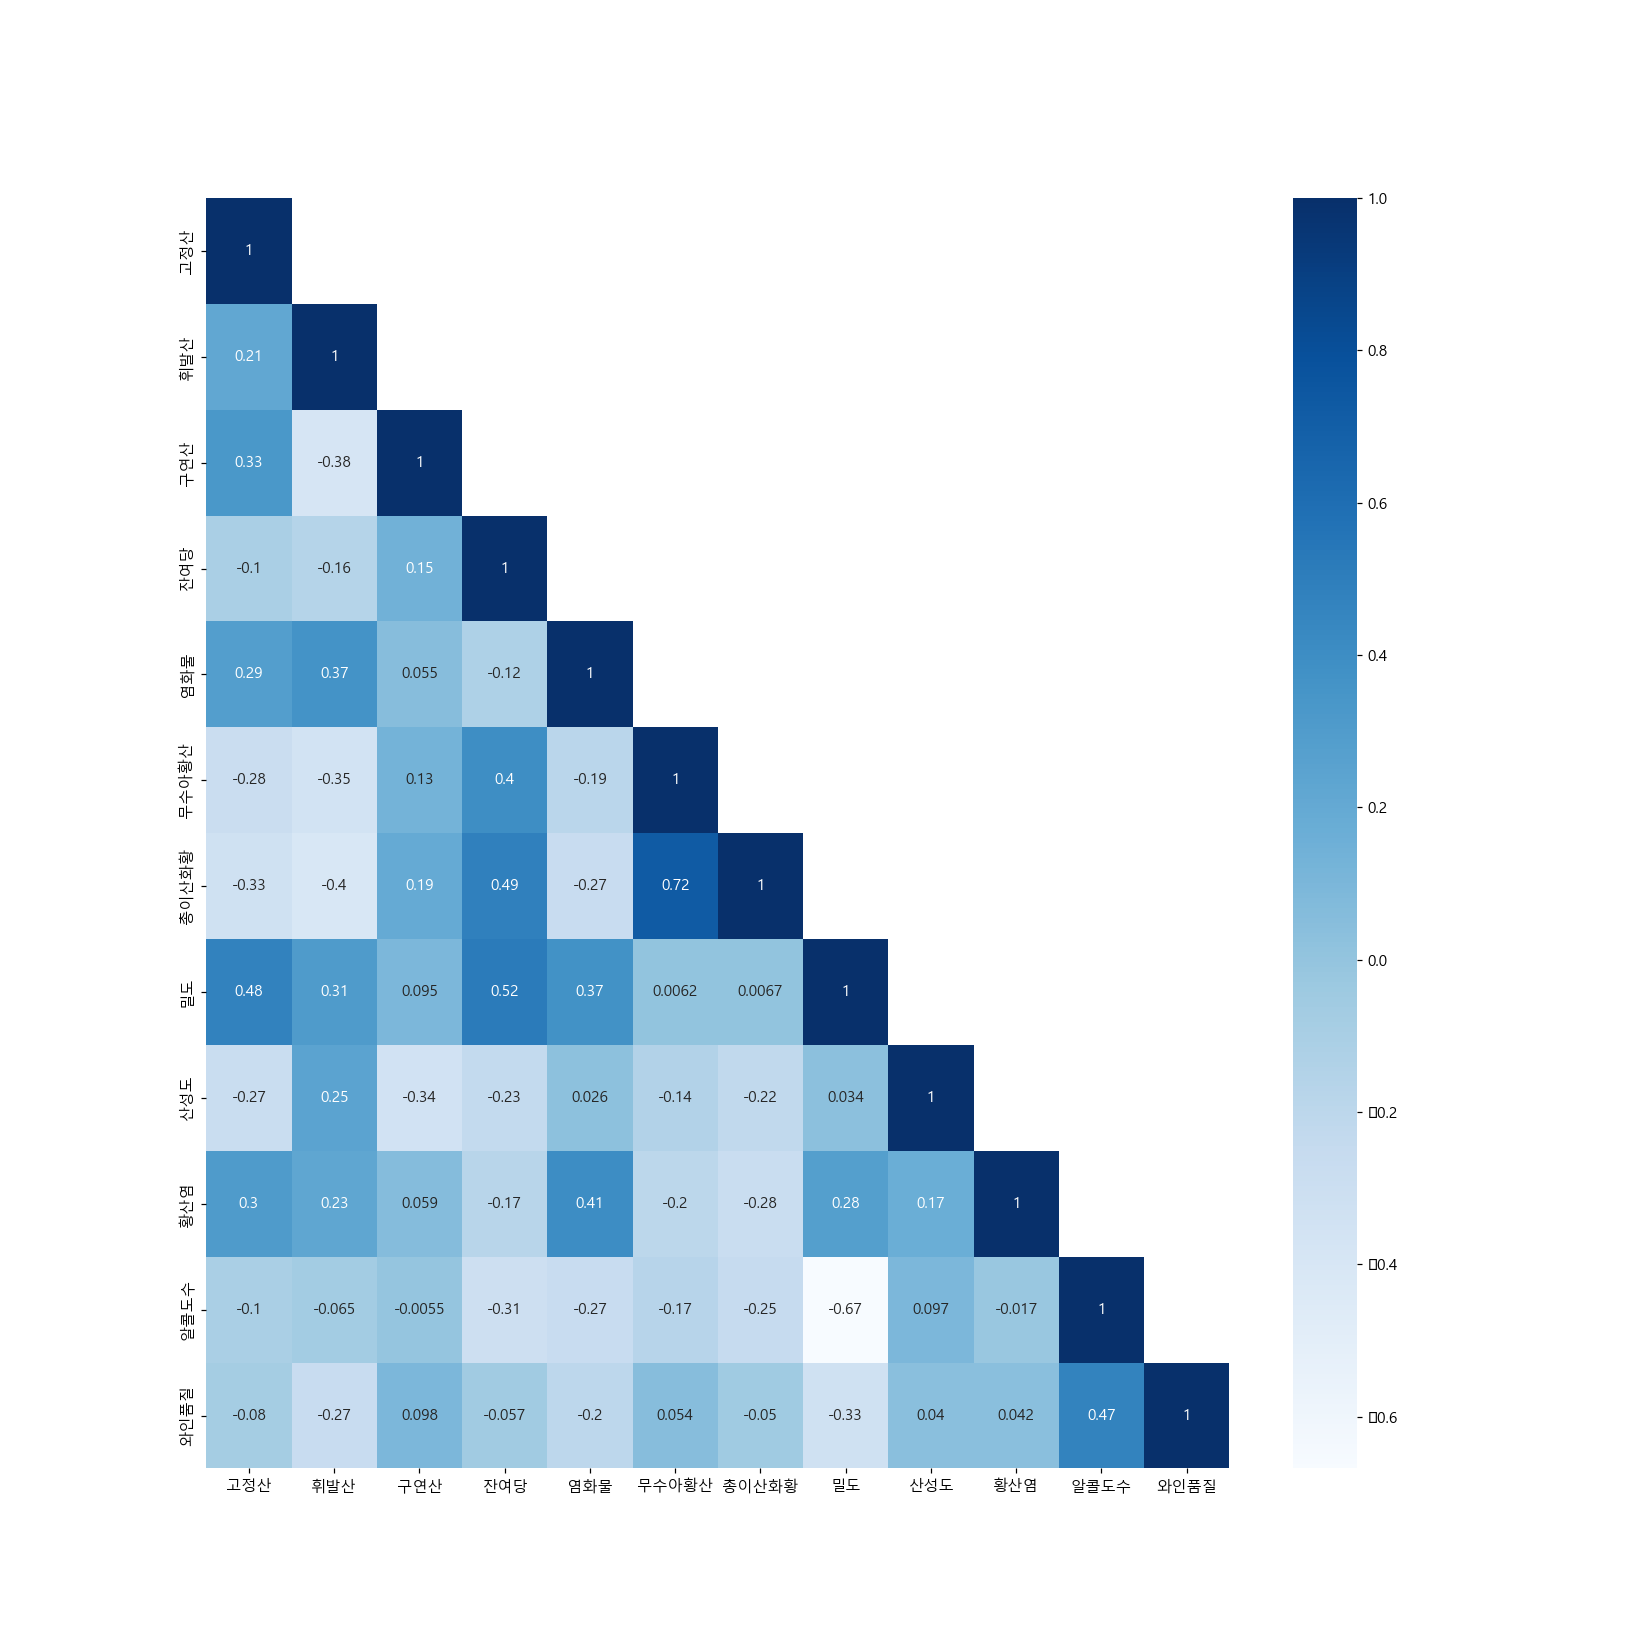

C:\Users\iebpr\anaconda3\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


In [27]:
plt.figure(figsize=(15,15))
mask = np.array(wine_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(wine_corr, mask = mask, annot=True, cmap='Blues')
plt.show()

<IPython.core.display.Javascript object>


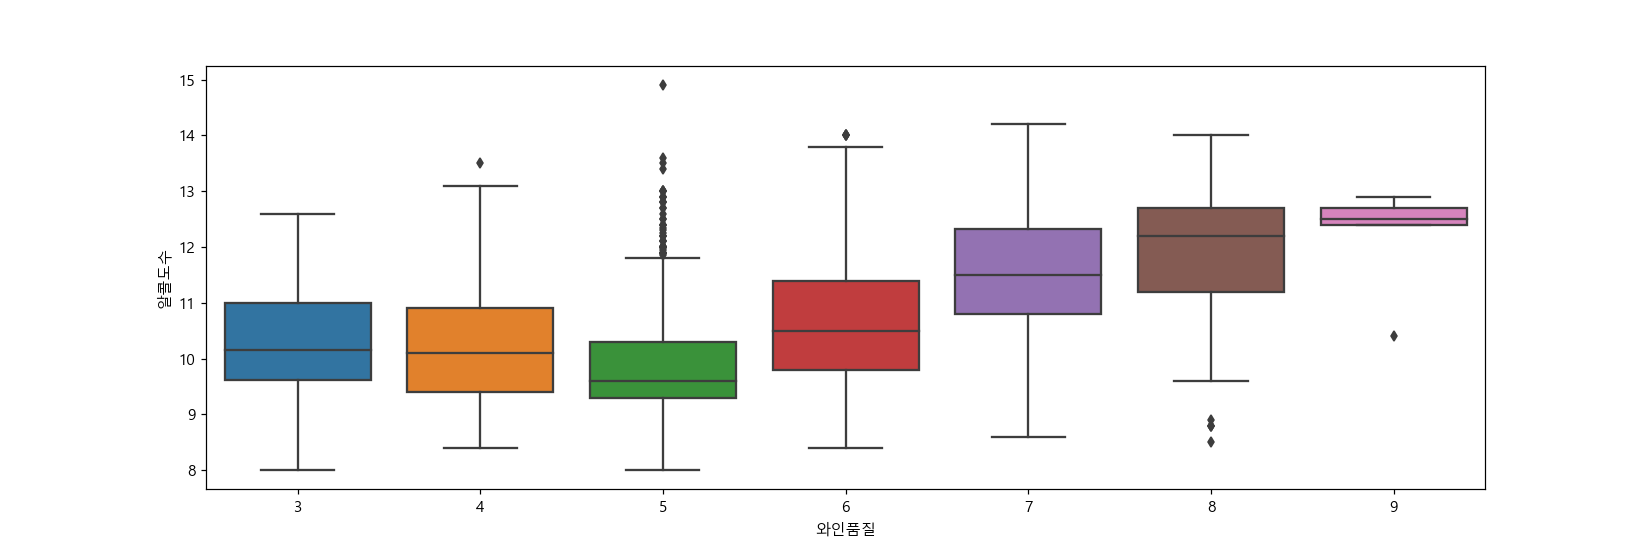

In [28]:
plt.figure(figsize=(15,5))
sns.boxplot(x = '와인품질', y = '알콜도수', data = wine)
plt.show()

<IPython.core.display.Javascript object>


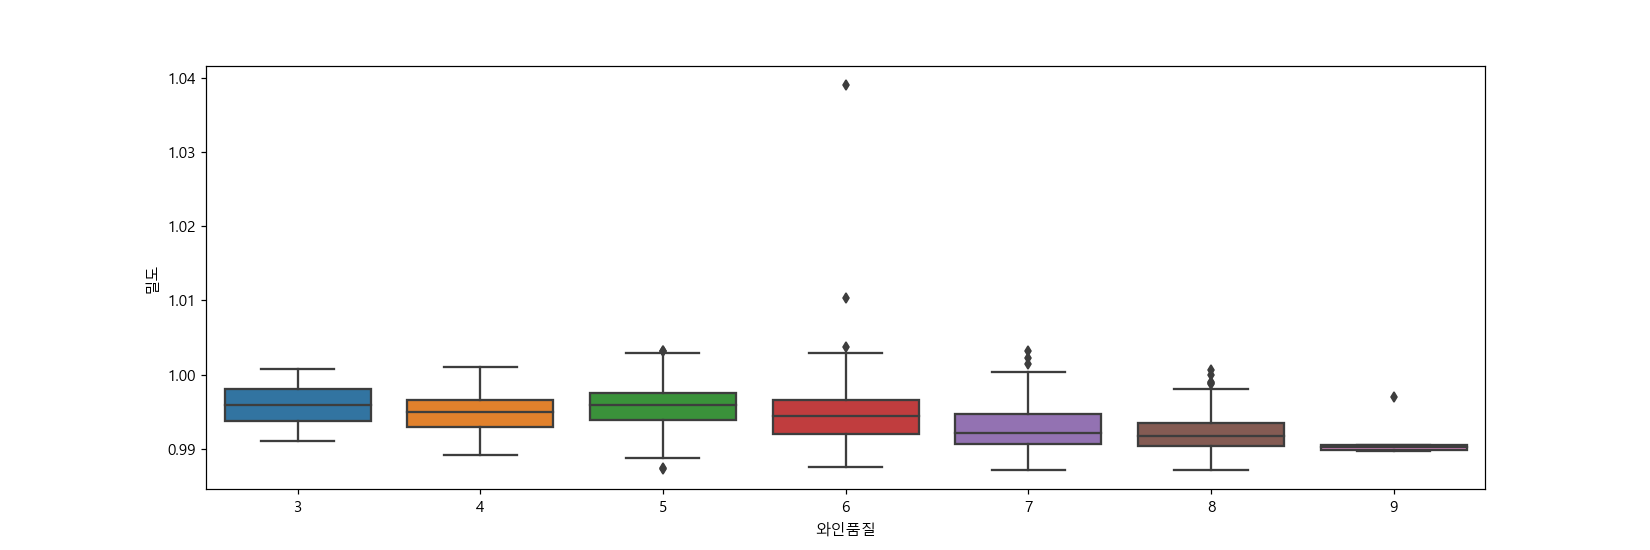

In [29]:
plt.figure(figsize=(15,5))
sns.boxplot(x = '와인품질', y = '밀도', data = wine)
plt.show()

<IPython.core.display.Javascript object>


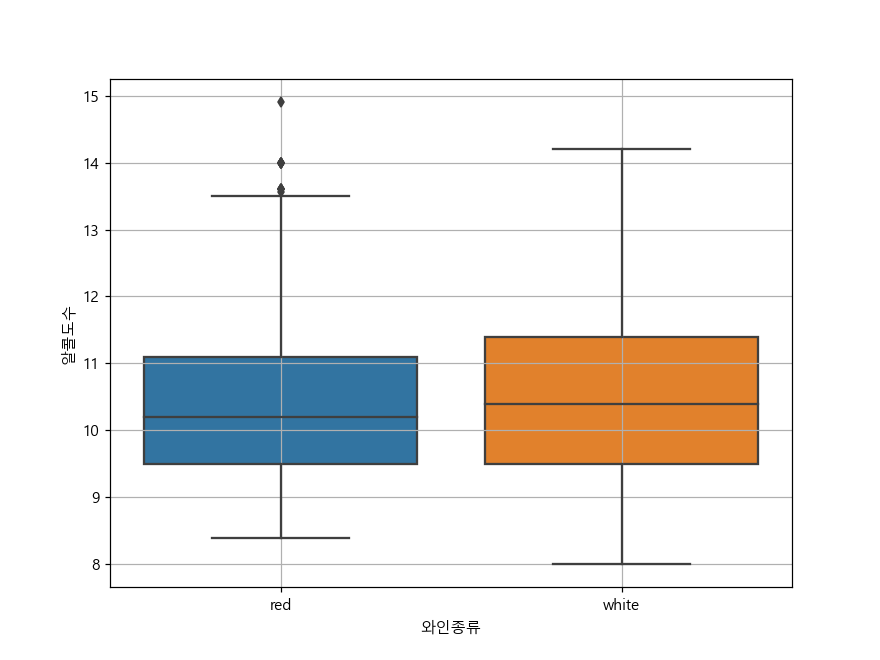

In [30]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x = '와인종류', y = '알콜도수', data = wine)
plt.grid()
plt.show()

In [31]:
red = wine[wine.와인종류 == 'red']['알콜도수']
white = wine[wine.와인종류 == 'white']['알콜도수']

In [32]:
tTestResult= stats.ttest_ind(red, white)
tTestResult

Ttest_indResult(statistic=-4.218888835968011, pvalue=2.4959339763303842e-05)

In [33]:
red.mean()

10.432315428010792

In [34]:
white.mean()

10.58935790625263